# GAN - CelebA dataset

## Warning:
Sieć na runtime v2-8 TPU zajmuje około 60GB ram i około 20GB dysku

## 1. Tytuł:</br>Tworzenie realistycznych twarzy z wykorzystaniem sieci generatywnej

## 2. Autorzy

Aleksandra Stanisławska</br>
Michał Żyrek

## 3. Informacje o przedmiocie, danych i zakresie projektu
Celem projektu było stworzenie i przetestowanie sieci GAN (Generative Adversarial Network) zdolnej do generowania obrazów na podstawie przestrzeni latentnej. Model może zostać wykorzystany do tworzenia na przykład obrazów twarzy, które nie należą do rzeczywistych osób, co może być przydatne w przypadku tworzenia gier komputerowych, animacji bądź filmów.

Dane użyte w projekcie pochodzą z zestawu CelebA (CelebFaces Attributes Dataset), który jest popularnym zbiorem danych do zadań związanych z generowaniem i klasyfikacją obrazów twarzy. Zestaw CelebA składa się z ponad 200 tysięcy obrazów twarzy celebrytów, każdy obraz posiada dodatkowe adnotacje, takie jak atrybuty twarzy (np. okulary, broda, włosy).
Do projektu wykorzystano podzbiór obrazów CelebA, który został przetworzony do rozdzielczości 64×64. Dane zostały normalizowane do zakresu wartości [−1,1], co było niezbędne do stabilnego treningu sieci GAN.


In [ ]:
#Konieczne było zainstalowanie niższej wersji Tensorflow, gdyż wersja domyślna 2.17.1 powodowała błędy podczas wywoływania kodu
!pip uninstall tensorflow -y
!pip install tensorflow==2.13.0

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstal

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Dropout, Conv2DTranspose, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

## 4. Import danych

W celu wczytania i przygotowania danych użyto funkcji load_celeba_data</br></br>
Ścieżka do danych: </br>Dane znajdują się w folderze img_align_celeba. Folder ten zawiera obrazy w formacie .jpg </br></br>
Zmiana rozmiaru obrazów: </br>Wszystkie obrazy są skalowane do rozdzielczości 64×64×3, aby były zgodne z architekturą modelu GAN. </br></br>
Normalizacja danych: </br>Piksele obrazów zostały przeskalowane do zakresu
[0,1] (podzielone przez 255), a następnie przekształcone do zakresu
[−1,1] podczas treningu modelu. Normalizacja jest kluczowa dla stabilności uczenia GAN. </br></br>
Wczytanie danych: </br>Użyto funkcji os.listdir, aby iterować po plikach w katalogu, i biblioteki PIL do odczytu oraz przekształcenia obrazów.

## 5. Opis zbioru danych

Liczba obrazów: </br>Zbiór zawiera 202,599 kolorowych obrazów celebrytów.</br></br>
Format: </br>Obrazy są zapisane w formacie .jpg. Każdy obraz ma początkową rozdzielczość 178×218 pikseli.</br></br>
Atrybuty: </br>Każdy obraz jest opisany za pomocą 40 atrybutów binarnych, takich jak:</br>
płeć,</br>
obecność okularów przeciwsłonecznych,</br>
broda, </br>wąsy, </br>uśmiech,</br>
kolor włosów</br>długość włosów.</br></br>
Przetwarzanie danych w projekcie:</br>
Wszystkie obrazy zostały przeskalowane do rozdzielczości
64×64×3 na potrzeby treningu sieci GAN.
Dane zostały znormalizowane do zakresu
[−1,1], aby zwiększyć stabilność uczenia.

##6. Przygotowanie danych
W kodzie obrazy z zestawu CelebA są wczytywane z folderu img_align_celeba.</br>Początkowa rozdzielczość obrazów wynosi
178×218. Obrazy zostały przeskalowane do
64×64×3.</br>CelebA to zbiór obrazów twarzy, które najlepiej wyglądają w średniej rozdzielczości, a 64×64 jest kompromisem między jakością a czasem treningu.
W tym celu zastosowano funkcję resize z biblioteki PIL. </br></br>
Normalizacja pikseli:</br>
Wszystkie piksele obrazów są przeskalowane do zakresu
[0,1] poprzez podzielenie przez 255.</br>
Następnie, w funkcji train_gan, wartości pikseli są przekształcone do zakresu
[−1,1]. w celu stabilizacji modelu oraz dopasowania do funkcji aktywacji generatora i dyskryminatora.</br></br>
Filtracja danych:</br>
Obrazy, które nie spełniają wymagań wymiarów
64×64×3, są automatycznie pomijane. Pozwala to na uniknięcie potencjalnych błędów podczas treningu sieci.



In [ ]:
!pip install kaggle
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.33G/1.33G [00:06<00:00, 248MB/s]
100% 1.33G/1.33G [00:06<00:00, 237MB/s]


In [ ]:
!unzip celeba-dataset.zip -d celeba

Streaming output truncated to the last 5000 lines.
  inflating: celeba/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: celeba/img_align_celeba/img_align_celeba/197617.jpg  
  inflating

In [ ]:
def load_celeba_data(folder_path, img_size=(64, 64)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(folder_path, filename))
            img = img.resize(img_size)
            img = np.array(img) / 255.0  # Normalizacja do [0, 1]
            if img.shape == (64, 64, 3):  # Pomijanie obrazów o niewłaściwych wymiarach
                images.append(img)
    return np.array(images)


In [ ]:
folder_path = '/content/celeba/img_align_celeba/img_align_celeba'
train_images = load_celeba_data(folder_path, img_size=(64, 64))
print(f"Załadowano {train_images.shape[0]} obrazów o wymiarach {train_images.shape[1:]}")



Załadowano 202599 obrazów o wymiarach (64, 64, 3)


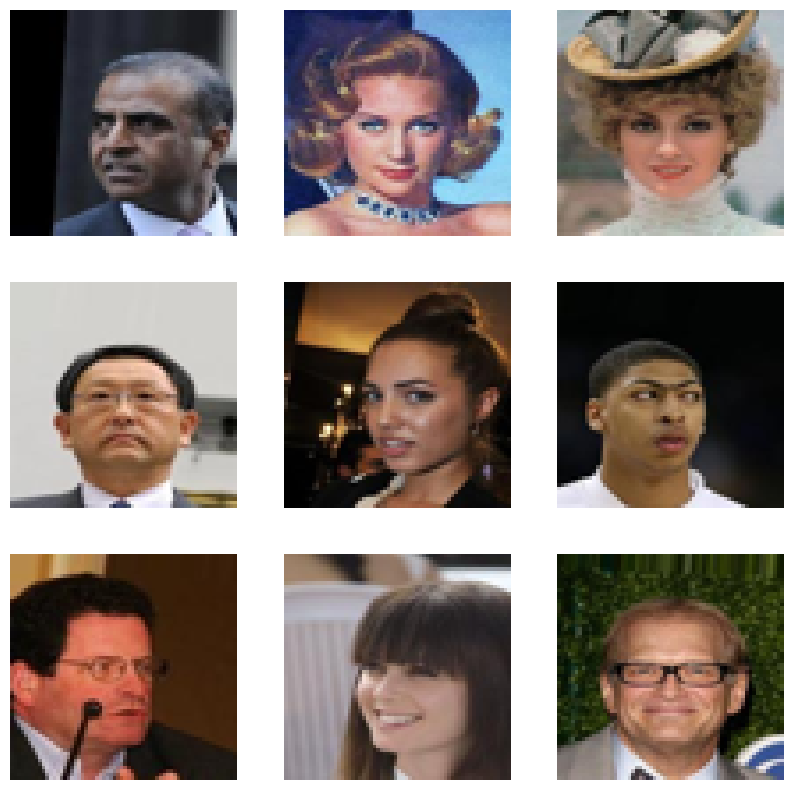

In [ ]:
# Wyświetlanie przykładowych obrazów
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.show()

In [ ]:
#usnięcie poprzednich wyników w celach klarowności i ułatwienia analizy
!rm /content/*epoch*

## 7. Budowa sieci

Generator:</br>
Generator przekształca losowy wektor latentny
z o wymiarze z_dim =256 w obraz RGB o wymiarach 64×64×3. </br></br>

Architektura obejmuje:</br>
Warstwę gęstą (Dense), która przekształca
z w tensor o wymiarach 8×8×256.</br>
Warstwy transponowanych splotów (Conv2DTranspose), które stopniowo zwiększają rozdzielczość obrazu z 8×8 do 64×64. </br>
Funkcję aktywacji LeakyReLU w celu zapobiegania zaniku gradientów.</br>
Normalizację (BatchNormalization) dla stabilności treningu.</br>
Ostatnią warstwę aktywacji tanh, która mapuje wartości wyjściowe do zakresu
[−1,1].</br>

Dokładne rozpisanie warstw ich typu oraz liczby neuronów:
1. Dense	Ukryta	16384
2. Conv2DTranspose	Ukryta	32768
3. Conv2DTranspose	Ukryta	65536
4. Conv2DTranspose	Ukryta	131072
5. Conv2DTranspose	Wyjściowa	12288</br>




Dyskryminator:</br>
Dyskryminator to klasyfikator binarny, który ocenia, czy obraz jest wygenerowany (0) czy rzeczywisty (1). </br></br>

Architektura obejmuje:</br>
Warstwy konwolucyjne (Conv2D), które zmniejszają rozdzielczość obrazu z 64×64 do 8×8. </br>
Funkcję aktywacji LeakyReLU dla stabilnej propagacji gradientów.</br>
Dropout w celu zmniejszenia przeuczenia.</br>
Ostatnią warstwę (Dense) z aktywacją sigmoid, która przewiduje wartość w zakresie [0,1].</br>

Dokładne rozpisanie warstw ich typu oraz liczby neuronów:
1. Conv2D	Ukryta	65536
2. Conv2D	Ukryta	32768
3. Conv2D	Ukryta	16384
4. Flatten	Ukryta	16384
5. Dense	Wyjściowa	1</br>



Uzasadnienie:</br>
W generatorze stopniowe zwiększanie rozdzielczości obrazu zapewnia tworzenie szczegółowych obrazów.</br>
Liczba filtrów maleje, ponieważ szczegółowe cechy obrazu są dodawane na wyższych poziomach rozdzielczości.</br>
Funkcje aktywacji (LeakyReLU i tanh) wspierają stabilny trening i generowanie danych.</br>

W dyskryminatorze stopniowe zmniejszanie rozdzielczości pozwala na wydobycie kluczowych cech obrazu.</br>
Liczba filtrów rośnie, aby na niższych poziomach uchwycić bardziej złożone wzorce.</br>
Funkcja aktywacji LeakyReLU stabilizuje propagację gradientów.</br>
Funkcja aktywacji sigmoid w warstwie wyjściowej dyskryminatora przekształca wynik w przedział [0,1], co pozwala na interpretację jako prawdopodobieństwo.



In [ ]:

# Generator

def build_generator(z_dim):
    model = Sequential()

    model.add(Dense(8 * 8 * 256, input_dim=z_dim))  # Dostosowano wymiary wyjściowe
    model.add(Reshape((8, 8, 256)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(128, kernel_size=5, strides=2, padding='same'))  # 16x16x128
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))  # 32x32x64
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(32, kernel_size=5, strides=2, padding='same'))  # 64x64x32
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Dropout(0.3))  # Dodano Dropout w generatorze

    model.add(Conv2DTranspose(3, kernel_size=5, strides=1, padding='same', activation='tanh'))  # 64x64x3
    return model

# Dyskryminator

def build_discriminator(img_shape):
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=img_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))  # Przywrócono mniejszy dropout

    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model




In [ ]:
# Budowa GAN

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential([
        generator,
        discriminator
    ])
    return model

## 8. Konfiguracja sieci neuronowej

**Dyskryminator**</br>

Optymalizator: </br>
Adam z parametrami learningrate=0.0001 i β 1=0.5.</br>
Adam jest jednym z najpopularniejszych optymalizatorów w GAN, ponieważ dobrze radzi sobie z niestabilnością gradientów i dostosowuje tepo uczenia w przeciwieństwie do standardowego SGD.</br>
Parametr 𝛽1=0.5 pomaga w stabilizacji treningu, redukując oscylacje wag.</br></br>
Funkcja kosztu:</br>
binary_crossentropy jest idealna dla klasyfikacji binarnej i oblicza różnicę między przewidywanym prawdopodobieństwem a rzeczywistą etykietą.</br></br>


**GAN**</br>
Zamrożenie wag dyskryminatora: </br>
Wagi dyskryminatora są zamrażane podczas trenowania modelu GAN, aby nie były aktualizowane, gdy uczymy generatora.</br></br>
Optymalizator: </br>
Adam z learningrate=0.0002 i β1=0.5.</br></br>

**Generator:**</br>
Nie jest kompilowany osobno, wagi generatora są aktualizowane za pośrednictwem modelu GAN, który łączy generator i dyskryminator oraz kompiluje je razem, definiując funkcję kosztu i optymalizator dla generatora.</br></br>

Stąd dla generatora możemy wyróznić parametry:</br></br>
Optymalizator: </br>
Adam z parametrami learningrate=0.0002 i β1=0.5.</br>
Wyższy współczynnik uczenia niż w dyskryminatorze (
0.0002 vs. 0.0001) pomaga generatorowi lepiej nadążać za dyskryminatorem.</br></br>
Funkcja kosztu: </br>binary_crossentropy.</br>
Generator próbuje minimalizować stratę wynikającą z błędnej klasyfikacji wygenerowanego obrazu jako fałszywego przez dyskryminatora.





In [ ]:
img_shape = (64, 64, 3)  # Zmieniono rozmiar obrazów na 64x64
z_dim = 512


In [ ]:
generator = build_generator(z_dim)
discriminator = build_discriminator(img_shape)
discriminator.compile(optimizer=tf.keras.optimizers.Adam(0.0001, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

gan = build_gan(generator, discriminator)
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy')

In [ ]:
# Zapis obrazów

def save_generated_images(epoch, generator, z_dim=512):
    noise = np.random.uniform(-1, 1, (25, z_dim))  # Zmieniono na równomierny rozkład szumu
    gen_images = generator.predict(noise)
    gen_images = 0.5 * (gen_images + 1)  # Przeskalowanie do [0, 1]

    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(gen_images[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.savefig(f"gan_images_epoch_{epoch}.png")
    plt.close()

In [ ]:
# Augmentacja danych - podjęlismy próby augmentacji danych, jednak wtedy wyniki byly znacznie gorsze

# def augment_images(images):
#     datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#         rotation_range=15,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         horizontal_flip=True
#     )
#     return datagen.flow(images, batch_size=64, shuffle=True)

## 9. Trenowanie sieci

Proces treningu:</br>

1. Normalizacja danych wejściowych - Wszystkie obrazy wejściowe zostały przeskalowane, aby były zgodne z aktywacją tanh w generatorze.</br>
2. Podział batcha:dla każdego batcha podzieliliśmy obrazy na dwie części:</br>
Połowa batcha: Obrazy rzeczywiste.</br>
Połowa batcha: Obrazy wygenerowane.</br>

3. Trening dyskryminatora:dyskryminator jest trenowany najpierw na obrazach rzeczywistych, a następnie na obrazach wygenerowanych.</br>
4. Trening generatora:generator jest trenowany pośrednio przez model GAN, który aktualizuje jego wagi na podstawie strat wynikających z oszukiwania dyskryminatora.Funkcja kosztu zmusza generator do generowania obrazów, które dyskryminator uzna za rzeczywiste. </br>
5. Zapisywanie postępów: co określoną liczbę epok (np. 50) zapisywane są: wygenerowane obrazy,straty generatora i dyskryminatora. </br></br>

Parametry treningu:</br>

Liczba epok: 4800-5000.</br>
Rozmiar batcha: 64.</br>
Wymiar przestrzeni latentnej (
z_dim ): 512.</br>
Wybrane parametry zapewniły wystarczającą liczbę iteracji, aby model nauczył się generować rozpoznawalne obrazy.
</br></br>

Poprawa skuteczności sieci:</br></br>
Próbowaliśmy następujących rzeczy:</br>

- wprowadzenie augmentacji danych, </br>
- działania na różnych datasetach,</br>
- zmiany w warstwach konwolucyjnych (w generatorze ustawienia 1024/512/256/128/64 oraz 512/256/128/64 - w obu przypadkach model bardzo szybko się przetrenowywał, tym samym generując obrazy słabej jakości, lub trening zajmował bardzo dużo czasu bez wyraźnych postpów)</br>
- próba trenowania dyskryminatora co x epok - nie wprowadzało znacznych zmian, a nawet czasem pogarszało działanie moodelu. </br>
- próba modyfikacji optimizera i learning rate np. generator 0,0002 i dyskryminator 0,00008 oraz inne modyfikacje - aktualne ustawienie dawało najlepsze wyniki, </br>
- modyfikacje wymiaru przestrzeni latentnej z_dim: 128,200,256 i 512, wyniki dla 256 i 512 były zbliżone, ale minimalnie lepsze dla 512, stąd decyzja o pozostaniu przy tej wartości, </br>
- zmiany w batch size: podejmowaliśmy próby przy batch size 32, 64 i 128, przy batch size 64 wyniki modleu i jakość obrazu były zadowalające. </br>

Patrząc na ograniczony czas oraz zasoby obliczeniowe, aktualne parametry modelu dają zadowalające wyniki, stąd decyzja o ich pozostawieniu.




  


In [ ]:
# Trening GAN
def train_gan(generator, discriminator, gan, train_images, epochs=4700, batch_size=64, z_dim=512):
    train_images = (train_images - 0.5) * 2  # Normalizacja do [-1, 1]
    half_batch = batch_size // 2

    metrics = {
        "epoch": [],
        "d_loss": [],
        "d_acc": [],
        "g_loss": []
    }

    for epoch in range(epochs):
        # Trening dyskryminatora
        idx = np.random.randint(0, train_images.shape[0], half_batch)
        real_images = train_images[idx]

        noise = np.random.uniform(-1, 1, (half_batch, z_dim))  # Zmieniono na równomierny rozkład szumu
        fake_images = generator.predict(noise)

        real_labels = np.ones((half_batch, 1))
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Trening generatora
        noise = np.random.uniform(-1, 1, (batch_size, z_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Zbieranie metryk
        metrics["epoch"].append(epoch)
        metrics["d_loss"].append(d_loss[0])
        metrics["d_acc"].append(100 * d_loss[1])
        metrics["g_loss"].append(g_loss)

        # Wyświetlanie postępów
        if epoch % 50 == 0:
            print(f"Epoch {epoch} [D loss: {d_loss[0]:.4f}, acc.: {100 * d_loss[1]:.2f}%] [G loss: {g_loss:.4f}")
            save_generated_images(epoch, generator, z_dim)

    return metrics


In [ ]:
# # Wczytywanie danych CIFAR-10 - początkowo próbowaliśmy też trenowac model na dataset CIFAR-10(caly zbior i wybrane kategorie) jednak znacząca różnorodnosc obrazów i ich ilośc nie dawały zadowalających wyników
# (train_images, train_labels), (_, _) = cifar10.load_data()

# # Filtrowanie dla psów (5) i kotów (3)
# categories_to_use = [3, 5]  # Koty i psy
# filtered_indices = np.isin(train_labels, categories_to_use)
# train_images_filtered = train_images[filtered_indices.flatten()]
# train_labels_filtered = train_labels[filtered_indices.flatten()]

# train_images_filtered = train_images_filtered / 255.0  # Normalizacja do [0, 1]
# print(f"Załadowano {train_images_filtered.shape[0]} obrazów z kategorii koty i psy o wymiarach {train_images_filtered.shape[1:]}.")


Załadowano 10000 obrazów z kategorii koty i psy o wymiarach (32, 32, 3).


In [ ]:
# Trenowanie - do punku 11 co 50 epok wyświetlane są metryki D_loss, G_loss, D_accuracy
metrics = train_gan(generator, discriminator, gan, train_images, epochs=4800, batch_size=64, z_dim=z_dim)

1/1 [==============================] - 0s 65ms/step
Epoch 0 [D loss: 0.6094, acc.: 62.50%] [G loss: 1.0623
1/1 [==============================] - 0s 71ms/step
Epoch 50 [D loss: 0.6873, acc.: 53.12%] [G loss: 0.7579
1/1 [==============================] - 0s 71ms/step
Epoch 100 [D loss: 0.6812, acc.: 60.94%] [G loss: 0.9316
1/1 [==============================] - 0s 69ms/step
Epoch 150 [D loss: 0.5999, acc.: 75.00%] [G loss: 0.9855
1/1 [==============================] - 0s 68ms/step
Epoch 200 [D loss: 0.4894, acc.: 81.25%] [G loss: 0.8066
1/1 [==============================] - 0s 66ms/step
Epoch 250 [D loss: 0.6253, acc.: 64.06%] [G loss: 0.9587
1/1 [==============================] - 0s 55ms/step
Epoch 300 [D loss: 0.4567, acc.: 84.38%] [G loss: 1.3073
1/1 [==============================] - 0s 62ms/step
Epoch 350 [D loss: 0.6882, acc.: 50.00%] [G loss: 0.7372
1/1 [==============================] - 0s 73ms/step
Epoch 400 [D loss: 0.5969, acc.: 68.75%] [G loss: 1.1104
1/1 [=================

## 10. Ilustracja działania sieci

Funkcja generate_images generuje obrazy na podstawie losowych wektorów latentnych o wymiarze 512, które są przekształcane przez wytrenowany generator.</br> Wygenerowane obrazy są skalowane do zakresu [0,1] i wyświetlane w siatce 5x5 dla wizualnej oceny wyników.

In [ ]:
# Generowanie nowych obrazów
def generate_images(generator, z_dim=512, num_images=25):
    """
    Generuje nowe obrazy na podstawie losowych wektorów latentnych.

    Args:
    - generator: wytrenowany model generatora.
    - z_dim: wymiar przestrzeni latentnej.
    - num_images: liczba obrazów do wygenerowania.
    """
    # Generowanie losowych wektorów latentnych
    noise = np.random.uniform(-1, 1, (num_images, z_dim))

    # Generowanie obrazów
    generated_images = generator.predict(noise)

    # Przeskalowanie obrazów do zakresu [0, 1] (z [-1, 1])
    generated_images = 0.5 * (generated_images + 1)

    # Wyświetlanie obrazów
    fig, axs = plt.subplots(5, 5, figsize=(10, 10))
    cnt = 0
    for i in range(5):
        for j in range(5):
            axs[i, j].imshow(generated_images[cnt])
            axs[i, j].axis('off')
            cnt += 1
    plt.show()


1/1 [==============================] - 0s 51ms/step


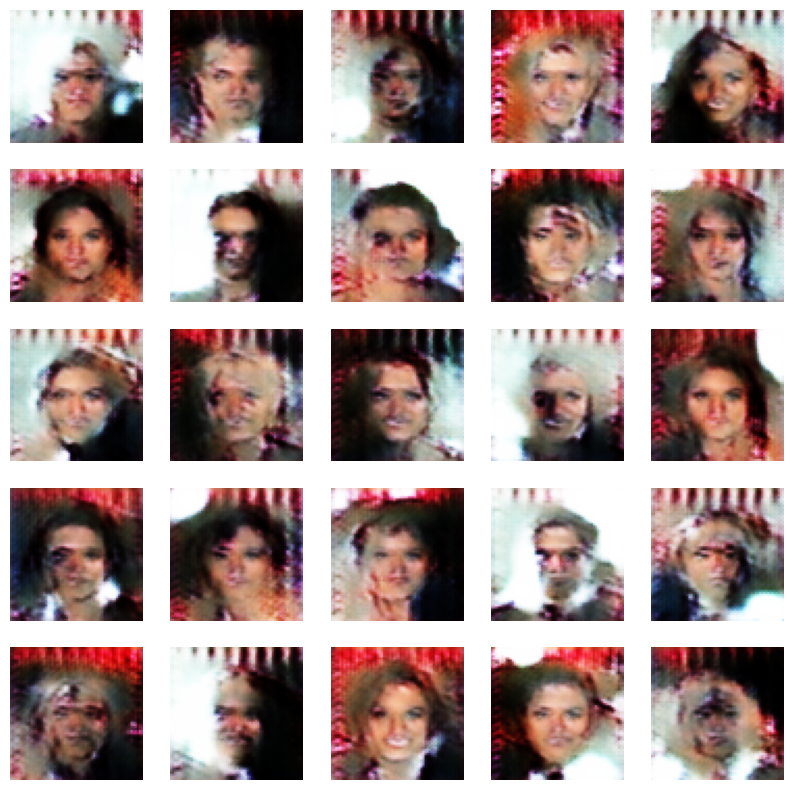

In [ ]:
generate_images(generator, z_dim=512, num_images=25)

## 11. Ewaluacja


Po treningu na zestawie danych CelebA, sieć GAN nauczyła się generować rozpoznawalne obrazy twarzy.</br>
W początkowych etapach treningu obrazy były słabej jakości, z widocznymi artefaktami. Jednak wraz z postępem treningu ich jakość znacznie się poprawiła.</br>
Najlepsze wyniki uzyskano w okolicach epoki 4800, co wskazuje, że dłuższy trening (do 4700 epok) był korzystny dla jakości modelu.</br>
Wyniki metryk takich jak D loss G loss i D accuracy pokazane są w outpucie komórki trenowania modelu.</br>
Pomimo że wyniki te nie zawsze były idealne - D accuracy osiągała od 60 do 70%, to czasem przy takich wynikach jakość obrazu była znacznie lepsza niż przy wynikach takich jak D accuracy 50%.

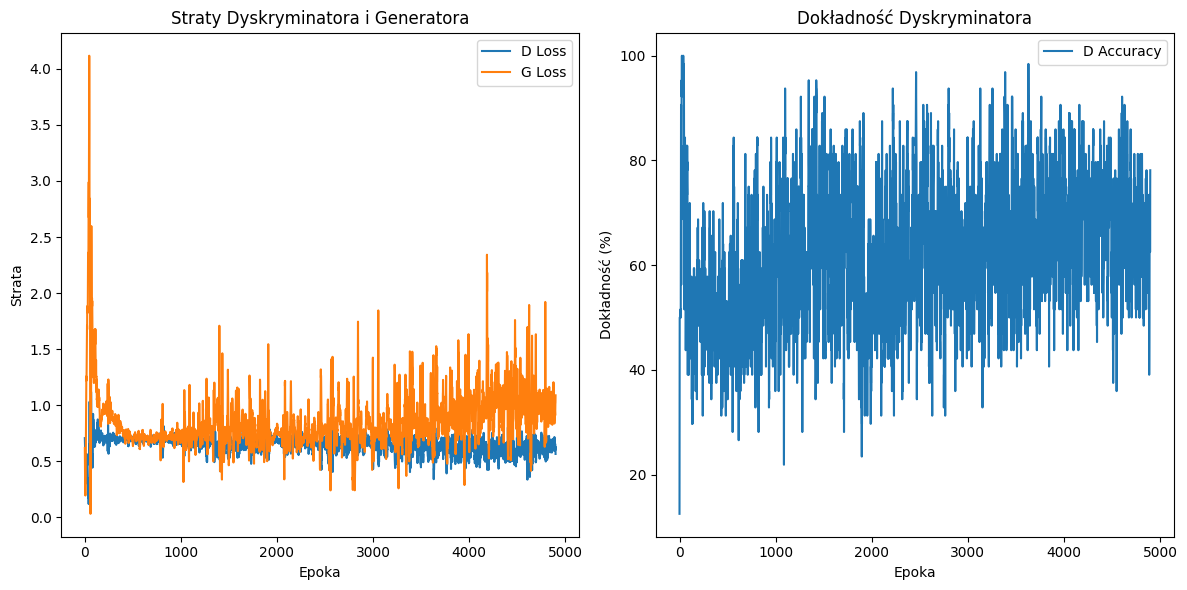

In [ ]:
# Generowanie raportu z metrykami
def plot_metrics(metrics):
    """
    Funkcja wizualizująca metryki modelu na przestrzeni epok.
    """
    epochs = metrics["epoch"]
    plt.figure(figsize=(12, 6))

    # Wykres strat dyskryminatora i generatora
    plt.subplot(1, 2, 1)
    plt.plot(epochs, metrics["d_loss"], label="D Loss")
    plt.plot(epochs, metrics["g_loss"], label="G Loss")
    plt.title("Straty Dyskryminatora i Generatora")
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.legend()

    # Wykres dokładności dyskryminatora
    plt.subplot(1, 2, 2)
    plt.plot(epochs, metrics["d_acc"], label="D Accuracy")
    plt.title("Dokładność Dyskryminatora")
    plt.xlabel("Epoka")
    plt.ylabel("Dokładność (%)")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)

##12.  Interpretacja merytoryczna opracowanej sieci neuronowej, w szczególności jakości jej działania

Model GAN skutecznie nauczył się generować obrazy twarzy, co potwierdzają wygenerowane próbki.</br>
Dokładność dyskryminatora wahała się między 50% a 70%, co wskazuje, że model działa w stabilnym zakresie równowagi między generatorem a dyskryminatorem. Wyższe wartości, takie jak 70%, mogą wskazywać, że dyskryminator jest nieco silniejszy, ale wciąż pozwala generatorowi poprawiać swoje wyniki.</br>
Wyniki obrazów są zgodne z oczekiwaniami projektu i potwierdzają skuteczność zastosowanej architektury oraz parametrów treningowych.</br>
Metryki takie jak straty dyskryminatora i generatora stabilizowały się w późniejszych epokach, co potwierdza osiągnięcie równowagi w procesie uczenia.</br>
Oczywiście poprawa modelu jest jeszcze możliwa np. testując różne modyfikacje w warstwach generatora i dyskryminatora oraz modyfikując parametry, ale na potrzeby projektu, mając na uwadze ograniczone zasoby wyniki działania sieci, są one bardzo zadowalające.
